In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp

In [6]:
f1 = 15 #Frecuencia de la señal T = 1/15 = 0.066s
f2 = 20
fs1 = 10*f1 # 150 Hz Frecuencia de muestreo
fs2 = 10*f2
Delta1 = 1/fs1 # Delta = Ts = 1/fs Tiempo de muestreo
Delta2 = 1/fs2

In [7]:
t1 = np.arange(0, 0.3+Delta1, Delta1) # Tiempo de calculo
t2 = np.arange(0, 0.3+Delta2, Delta2)
w1 = 2*np.pi*f1 # w = omega
w2 = 2*np.pi*f2
x1_t = np.cos(w1*t1)
x2_t = np.cos(w2*t2)

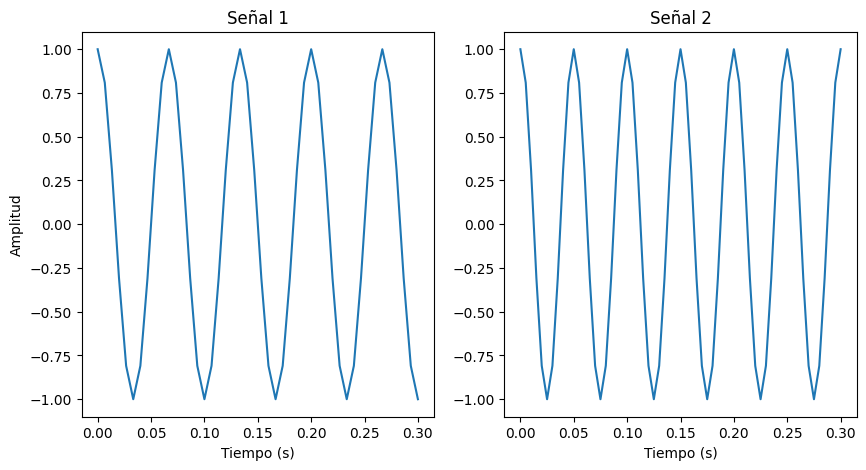

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(t1, x1_t)
plt.title('Señal 1')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.subplot(1, 2, 2)
plt.plot(t2, x2_t)
plt.title('Señal 2')
plt.xlabel('Tiempo (s)')
plt.show()

In [10]:
fs1_new = 4*fs1 # 4*10*f1 = 600Hz
fs2_new = 3*fs2 # 600 Hz
Delta1_new = 1/fs1_new
Delta2_new = 1/fs2_new
t1_new = np.arange(0, 0.3+Delta1_new, Delta1_new)
t2_new = np.arange(0, 0.3+Delta2_new, Delta2_new)

In [11]:
Z1 = int(Delta1/Delta1_new)
M1 = 1/Z1
L_t1 = len(x1_t)
L_tI1 = len(t1_new)
x_tI1 = np.arange(1, L_tI1+1, dtype = float)

In [13]:
k = 0
for i in range(L_t1-1):
  x_tI1[k] = x1_t[i]
  for j in range(1, Z1):
    Dif = x1_t[i+1]-x1_t[i]
    A = j*M1*Dif+x1_t[i]
    x_tI1[k+1] = A
    k = k+1
  k = k+1
x_tI1[L_tI1-1] = x1_t[L_t1-1]

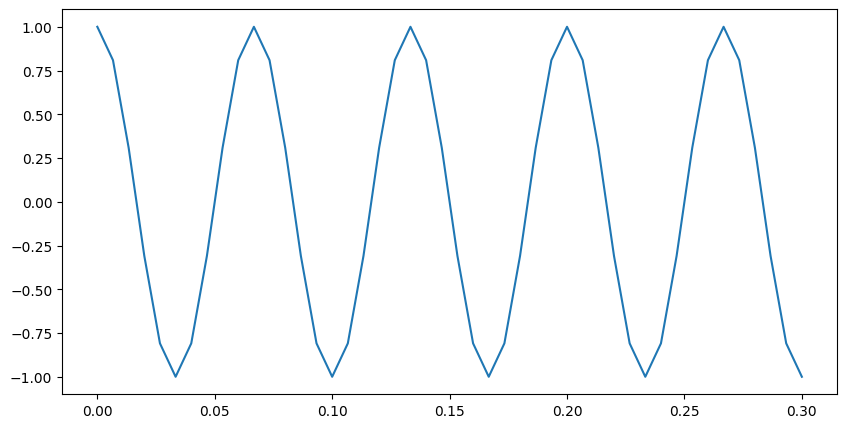

In [15]:
plt.figure(figsize=(10,5))
plt.plot(t1_new, x_tI1)
plt.show()

In [16]:
Z2 = int(Delta2/Delta2_new)
M2 = 1/Z2
L_t2 = len(x2_t)
L_tI2 = len(t2_new)
x_tI2 = np.arange(1, L_tI2+1, dtype = float)

In [17]:
k = 0
for i in range(L_t2-1):
  x_tI2[k] = x2_t[i]
  for j in range(1, Z2):
    Dif = x2_t[i+1]-x2_t[i]
    A = j*M2*Dif+x2_t[i]
    x_tI2[k+1] = A
    k = k+1
  k = k+1
x_tI2[L_tI2-1] = x2_t[L_t2-1]

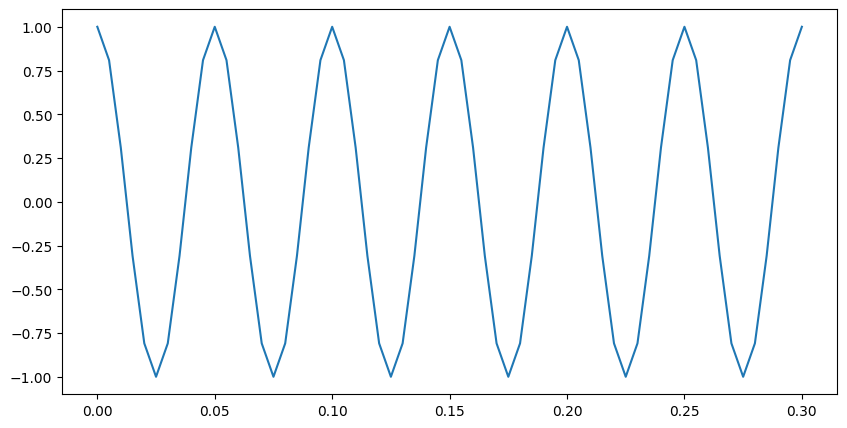

In [18]:
plt.figure(figsize=(10,5))
plt.plot(t2_new, x_tI2)
plt.show()

In [22]:
x_t = x_tI1 + x_tI2


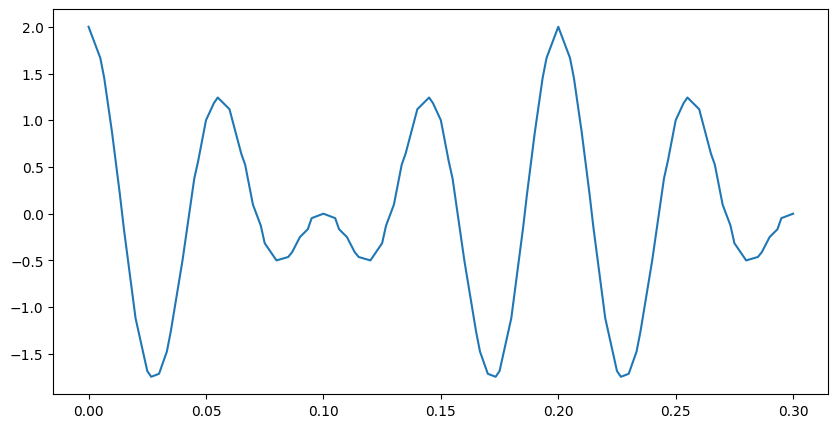

In [23]:
plt.figure(figsize=(10,5))
plt.plot(t1_new, x_t)
plt.show()

Interpolacion lineal


In [24]:
x_int = interp.splrep(t1, x1_t)
t1_int = np.arange(0, 0.3+Delta1_new, Delta1_new)
x_t_int = interp.splev(t1_int, x_int)

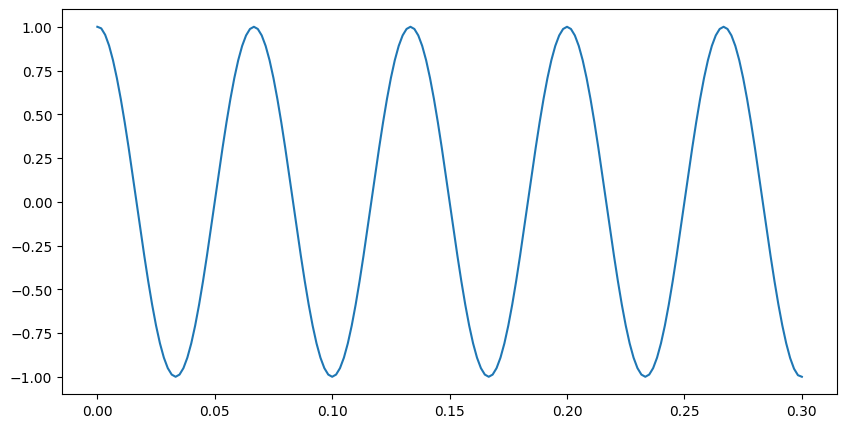

In [25]:
plt.figure(figsize=(10,5))
plt.plot(t1_int, x_t_int)
plt.show()

In [26]:
x2_int = interp.splrep(t2, x2_t)
t2_int = np.arange(0, 0.3+Delta2_new, Delta2_new)
x2_t_int = interp.splev(t2_int, x2_int)

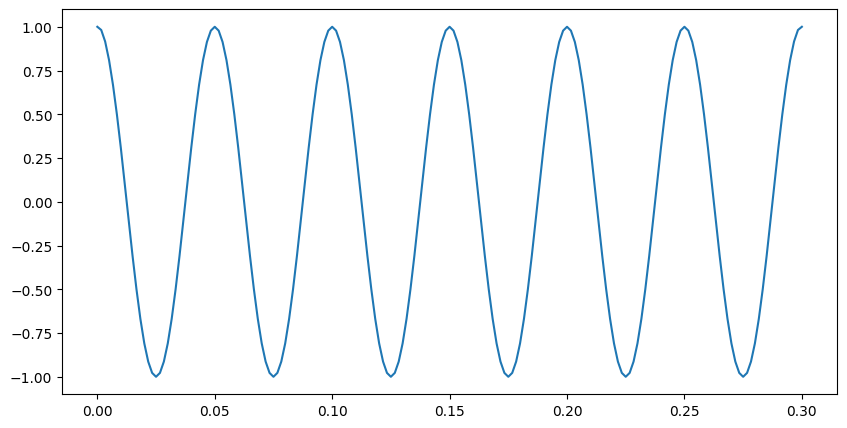

In [27]:
plt.figure(figsize=(10,5))
plt.plot(t2_int, x2_t_int)
plt.show()

In [29]:
xt_t_int = x_t_int + x2_t_int

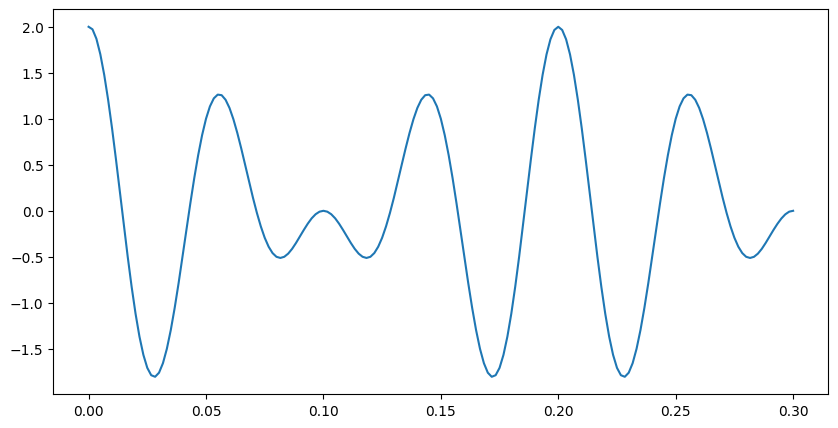

In [30]:
plt.figure(figsize=(10,5))
plt.plot(t1_int, xt_t_int)
plt.show()